# Walkthrough

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

## Data collection

In [2]:
url = "https://www.amazon.com/s/ref=sr_nr_p_72_3?fst=as%3Aoff&rh=n%3A165793011%2Cn%3A%21165795011%2Cn%3A196601011%2Cp_n_age_range%3A165813011%2Cp_72%3A1248966011&bbn=196601011&ie=UTF8&qid=1524683296&rnid=1248961011"

In [3]:
response = requests.get(url)

In [4]:
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'
}
response = requests.get(url, headers=headers)

In [5]:
root = BeautifulSoup(response.text, "html5lib")

In [6]:
items = root.find_all("div", class_="s-item-container")

In [7]:
print(items[1].find("img")["src"])
print(items[1].find("a", class_="s-access-detail-page").text)
print(items[1].find("span", class_="sx-price-whole").text)
print(items[1].find("sup", class_="sx-price-fractional").text)
print(items[1].find("i", class_="a-icon-star").text)
print(items[1].find("a", {"href":lambda x : x.endswith("#customerReviews")}).text)


https://images-na.ssl-images-amazon.com/images/I/41n-1nusieL._AC_US160_.jpg
The First Years Stack Up Cups
3
99
4.8 out of 5 stars
1,798


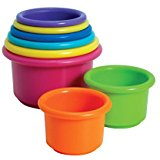

In [8]:
response2 = requests.get(items[1].find("img")["src"], headers=headers)
display.Image(data=response2.content)

In [9]:
[x.find("a")["href"] for x in root.find_all("span", class_="pagnLink")][0]

'/s/ref=sr_pg_2/141-4642046-9099758?fst=as%3Aoff&rh=n%3A165793011%2Cn%3A%21165795011%2Cn%3A196601011%2Cp_n_age_range%3A165813011%2Cp_72%3A1248966011&page=2&bbn=196601011&ie=UTF8&qid=1525113995'

In [10]:
import pickle

In [93]:
# ....
urls = []
all_items = []
with open("output.pkl", "rb") as f:
    while True:
        try:
            urls.append(pickle.load(f, encoding='bytes'))
            all_items += pickle.load(f, encoding='bytes')
        except:
            break
all_items = [{k.decode("utf-8"):v for k,v in item.items()} for item in all_items]        
df = pd.DataFrame(all_items)

In [94]:
df.iloc[0]

img_data       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
img_link       https://images-na.ssl-images-amazon.com/images...
link           https://www.amazon.com/VTech-Stand-Learning-Fr...
name           VTech Sit-to-Stand Learning Walker (Frustratio...
num_ratings                                                7,665
price                                                      24.88
stars                                         4.7 out of 5 stars
Name: 0, dtype: object

## Visualization and cleaning

In [95]:
df["num_ratings"] = df["num_ratings"].apply(lambda x : float(x.replace(",","")))
df["stars"] = df["stars"].apply(lambda x : float(x.split()[0]))
df["rating"] = (df["stars"]-1)/4

(array([ 393.,  314.,  423.,  278.,  251.,  290.,  224.,  228.,  163.,
         145.,  110.,  110.,   85.,   69.,   48.,   33.,   34.,   24.,
           9.,   12.,    3.,    2.,    1.,    0.,    1.]),
 array([ 0.69897   ,  0.82639169,  0.95381338,  1.08123506,  1.20865675,
         1.33607844,  1.46350012,  1.59092181,  1.71834349,  1.84576518,
         1.97318687,  2.10060855,  2.22803024,  2.35545192,  2.48287361,
         2.6102953 ,  2.73771698,  2.86513867,  2.99256036,  3.11998204,
         3.24740373,  3.37482541,  3.5022471 ,  3.62966879,  3.75709047,
         3.88451216]),
 <a list of 25 Patch objects>)

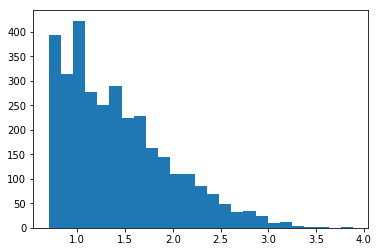

In [99]:
plt.hist(np.log10(df["num_ratings"]), bins=25)

(array([   4.,    0.,    0.,    0.,    2.,    6.,    9.,    8.,   21.,
          12.,   33.,   60.,   82.,   79.,   69.,  154.,  191.,  116.,
         310.,  212.,  452.,  523.,  267.,  415.,  225.]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

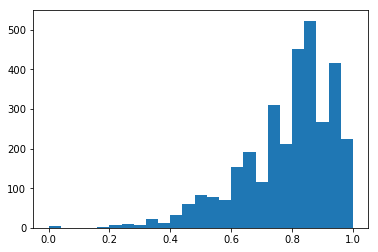

In [100]:
plt.hist(df["rating"], bins=25)

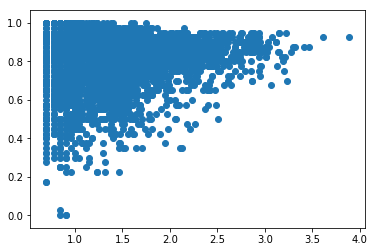

In [101]:
plt.scatter(np.log10(df["num_ratings"]), df["rating"])

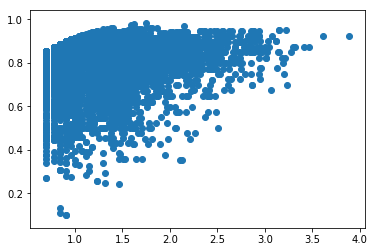

In [102]:
df["bayes_rating"] = (df["rating"]*df["num_ratings"] + 1)/(df["num_ratings"]+2)
plt.scatter(np.log10(df["num_ratings"]), df["bayes_rating"])

In [103]:
plt.hist(np.log10(df["price"][~pd.isnull(df["price"])]), bins=25)

(array([   1.,    2.,    4.,   24.,   80.,  159.,  302.,  409.,  456.,
         322.,  325.,  213.,  164.,  121.,   80.,   63.,   46.,   31.,
          17.,   15.,   13.,    5.,    2.,    5.,    3.]),
 array([ 0.30103   ,  0.39857137,  0.49611275,  0.59365413,  0.69119551,
         0.78873688,  0.88627826,  0.98381964,  1.08136102,  1.17890239,
         1.27644377,  1.37398515,  1.47152653,  1.5690679 ,  1.66660928,
         1.76415066,  1.86169204,  1.95923341,  2.05677479,  2.15431617,
         2.25185755,  2.34939892,  2.4469403 ,  2.54448168,  2.64202306,
         2.73956443]),
 <a list of 25 Patch objects>)

In [104]:
df.dropna(subset=["price"], inplace=True)

In [105]:
plt.scatter(np.log10(df["price"]), df["bayes_rating"])

In [106]:
df.sort_values(by=["bayes_rating"], ascending=False, inplace=True)

In [107]:
df = df[df["num_ratings"]>4].copy()

## First (rarely successful) take on machine learning

(array([   3.,    0.,    0.,    0.,    7.,    8.,    7.,   14.,   18.,
          30.,   51.,   95.,   61.,   98.,  120.,  137.,  177.,  191.,
         284.,  306.,  354.,  420.,  282.,  169.,   30.]),
 array([ 0.1       ,  0.13531034,  0.17062069,  0.20593103,  0.24124138,
         0.27655172,  0.31186207,  0.34717241,  0.38248276,  0.4177931 ,
         0.45310345,  0.48841379,  0.52372414,  0.55903448,  0.59434483,
         0.62965517,  0.66496552,  0.70027586,  0.73558621,  0.77089655,
         0.8062069 ,  0.84151724,  0.87682759,  0.91213793,  0.94744828,
         0.98275862]),
 <a list of 25 Patch objects>)

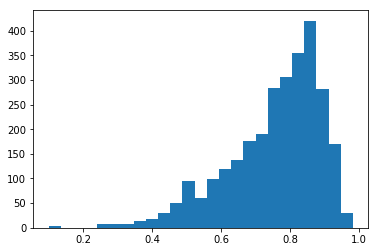

In [111]:
plt.hist(df["bayes_rating"], bins=25)

In [112]:
import scipy.stats as stats

((array([-3.48928144, -3.24473462, -3.10945565, ...,  3.10945565,
          3.24473462,  3.48928144]),
  array([-4.82221368, -4.74038871, -4.59719502, ...,  1.53285887,
          1.57291902,  1.67863899])),
 (0.96379292970860975, -1.5012366220867113e-14, 0.96273485542964321))

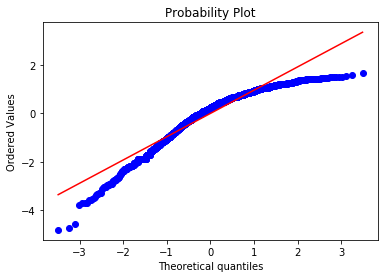

In [113]:
stats.probplot((df["bayes_rating"] - np.mean(df["bayes_rating"]))/np.std(df["bayes_rating"]),plot=plt)

In [114]:
df["logit_rating"] = np.log(df["bayes_rating"]/(1-df["bayes_rating"]))

In [115]:
plt.hist(df["logit_rating"], bins=25)

(array([   2.,    1.,    0.,    0.,    7.,    9.,   26.,   36.,  119.,
         132.,  192.,  231.,  295.,  373.,  388.,  368.,  253.,  199.,
         139.,   41.,   39.,   10.,    1.,    0.,    1.]),
 array([-2.19722458, -1.94761354, -1.69800251, -1.44839148, -1.19878044,
        -0.94916941, -0.69955837, -0.44994734, -0.20033631,  0.04927473,
         0.29888576,  0.54849679,  0.79810783,  1.04771886,  1.2973299 ,
         1.54694093,  1.79655196,  2.046163  ,  2.29577403,  2.54538506,
         2.7949961 ,  3.04460713,  3.29421817,  3.5438292 ,  3.79344023,
         4.04305127]),
 <a list of 25 Patch objects>)

((array([-3.48928144, -3.24473462, -3.10945565, ...,  3.10945565,
          3.24473462,  3.48928144]),
  array([-4.51810781, -4.36408863, -4.1242837 , ...,  2.61555149,
          2.83063709,  3.64199879])),
 (0.99837230177810776, -3.1765360099430616e-16, 0.99727626546078196))

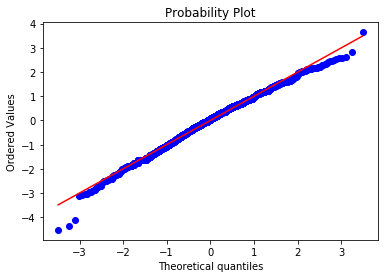

In [116]:
stats.probplot((df["logit_rating"] - np.mean(df["logit_rating"]))/np.std(df["logit_rating"]),plot=plt)

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10, max_df=0.3, ngram_range=(1,3))


X_tfidf = tfidf.fit_transform(df["name"]).toarray()
X = np.hstack([X_tfidf, np.log(df[["price"]]).values])
y = df["logit_rating"].values

In [118]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [32]:
print("Training MSE: ", np.mean((clf.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.360494880774
Baseline training MSE:  0.57679763421


In [33]:
print("CV MSE: ", np.mean((clf.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.523013048495
Baseline CV MSE:  0.564067894636


In [34]:
print("Test MSE: ", np.mean((clf.predict(X_test) - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.58075944376
Baseline Test MSE:  0.612558622219


## Playing a game

In [35]:
def display_item(s):
    display.display(display.Image(data = s["img_data"]))
    print(s["name"])
    print("$" + str(np.round(s["price"],3)))


In [36]:
def ranking_game():
    it1 = np.random.randint(len(df))
    it2 = np.random.randint(len(df))
    
    display_item(df.iloc[it1])
    print("-------")
    display_item(df.iloc[it2])
    print("-------")
    
    guess = int(input("Which item is rated higher (1/2)?"))
    
    print("True Rating: {} / {}".format(df.iloc[it1]["bayes_rating"], df.iloc[it2]["bayes_rating"]))
    correct = ((guess == 1) and (it1 < it2)) or ((guess == 2) and (it1 > it2))
    print("{}".format("Correct!" if correct else "Incorrect!"))

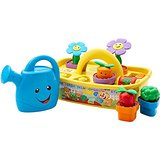

Fisher-Price Laugh & Learn Smart Stages Grow 'n Learn Garden Caddy
$24.99
-------


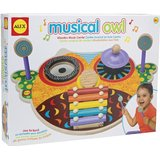

ALEX Toys Musical Owl
$16.99
-------
Which item is rated higher (1/2)?1
True Rating: 0.8074324324324325 / 0.8365384615384617
Incorrect!


In [37]:
ranking_game()

In [38]:
def ranking_game2():
    it1 = np.random.randint(len(df)//10)
    it2 = np.random.randint(len(df)//10) + 9*len(df)//10
    if np.random.rand() < 0.5:
        it1,it2 = (it2,it1)
    
    display_item(df.iloc[it1])
    print("-------")
    display_item(df.iloc[it2])
    print("-------")
    
    guess = int(input("Which item is rated higher (1/2)?"))
    
    print("True Rating: {} / {}".format(df.iloc[it1]["bayes_rating"], df.iloc[it2]["bayes_rating"]))
    correct = ((guess == 1) and (it1 < it2)) or ((guess == 2) and (it1 > it2))
    print("{}".format("Correct!" if correct else "Incorrect!"))

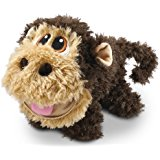

Stuffies - Baby Scout the Monkey
$21.99
-------


2-inch Penguin Rubber Duck (Bulk Pack of 12 Ducks)
$7.95
-------
Which item is rated higher (1/2)?1
True Rating: 0.9049999999999999 / 0.5423076923076924
Correct!


In [40]:
ranking_game2()

## Classification

In [122]:
idx = ((df["bayes_rating"] > np.percentile(df["bayes_rating"], 90)) |
       (df["bayes_rating"] < np.percentile(df["bayes_rating"], 10))).values
y = df["bayes_rating"] > np.median(df["bayes_rating"])

In [123]:
X_, X_test, y_, y_test = train_test_split(X[idx,:], y[idx], test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

In [124]:
X_train.shape

(277, 669)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))

0.992779783394
0.7


In [128]:
def get_err_samples(clf, X, y, X_cv, y_cv, n_samples):
    clf.fit(X[:n_samples], y[:n_samples])
    return np.array([clf.score(X[:n_samples], y[:n_samples]), clf.score(X_cv, y_cv)])

n_samples = [int(x) for x in np.linspace(20, X_train.shape[0], 10)]
errors = np.array([get_err_samples(clf, X_train, y_train, X_cv, y_cv, n) for n in n_samples])
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(["Training", "Validation"])

In [129]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
errors = np.array([get_err_samples(clf, X_train, y_train, X_cv, y_cv, n) for n in n_samples])
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(["Training", "Validation"])

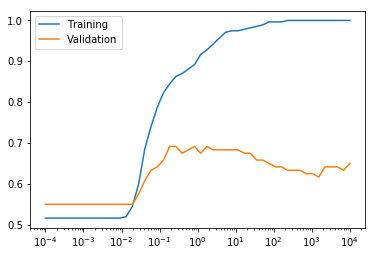

In [130]:
def get_err_C(clf, X, y, X_cv, y_cv, C):
    clf.C = C
    clf.fit(X, y)
    return np.array([clf.score(X, y), clf.score(X_cv, y_cv)])

C = np.logspace(-4, 4, 50)
errors = np.array([get_err_C(clf, X_train, y_train, X_cv, y_cv, c) for c in C])
plt.semilogx(C, errors[:,0], C, errors[:,1])
plt.legend(["Training", "Validation"])

In [134]:
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))
print(clf.score(X_test, y_test))

0.898916967509
0.675
0.701754385965


In [139]:
feature_names = np.array(tfidf.get_feature_names() + ["++price++"])

In [140]:
sorted(zip(feature_names, clf.coef_[0]), key=lambda x : np.abs(x[1]), reverse=True)[:20]

[('bath', -1.0998582551786644),
 ('and', 1.0954028039409269),
 ('green toys', 0.98395273227295454),
 ('frog', -0.91726295727875706),
 ('go', 0.87272474343975692),
 ('imaginext', 0.78991692736571695),
 ('doug', 0.78020112442135148),
 ('melissa doug', 0.78020112442135148),
 ('melissa', 0.77905357055216928),
 ('fisher', 0.76947656750321813),
 ('fisher price', 0.76947656750321813),
 ('price', 0.76947656750321813),
 ('with', 0.74108288761147312),
 ('playskool', 0.7270449833570779),
 ('crayola', -0.71886844630886249),
 ('kids', -0.69337146109167946),
 ('little tikes', -0.67831342789823301),
 ('tikes', -0.67831342789823301),
 ('piece', 0.67212093384960425),
 ('puzzle', 0.66734431522410265)]

## Image features

In [66]:
with open("image_features.npy", "rb") as f:
    X_img = np.load(f)
X = X_img

In [71]:
X_, X_test, y_, y_test = train_test_split(X[idx,:], y[idx], test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

In [72]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))

1.0
0.6


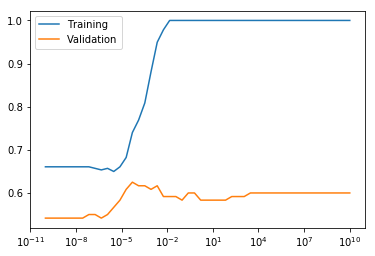

In [74]:
C = np.logspace(-10, 10, 50)
errors = np.array([get_err_C(clf, X_train, y_train, X_cv, y_cv, c) for c in C])
plt.semilogx(C, errors[:,0], C, errors[:,1])
plt.legend(["Training", "Validation"])

In [76]:
clf = LogisticRegression(C=1e-4)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))
print(clf.score(X_test, y_test))

0.754512635379
0.616666666667
0.590643274854


## Images and text

In [80]:
print(np.linalg.norm(X_tfidf))
print(np.linalg.norm(X_img))

53.2634959423
4306.66


In [81]:
X = np.hstack([X_tfidf, X_img/100, np.log(df[["price"]].values)])
X_, X_test, y_, y_test = train_test_split(X[idx,:], y[idx], test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

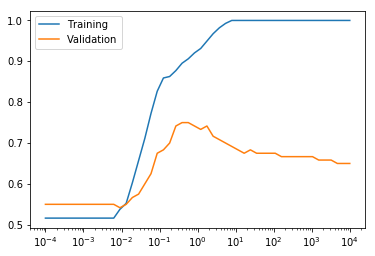

In [82]:
clf = LogisticRegression()
C = np.logspace(-4, 4, 50)
errors = np.array([get_err_C(clf, X_train, y_train, X_cv, y_cv, c) for c in C])
plt.semilogx(C, errors[:,0], C, errors[:,1])
plt.legend(["Training", "Validation"])

In [83]:
clf = LogisticRegression(C=0.5)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))
print(clf.score(X_test, y_test))

0.898916967509
0.75
0.783625730994


## Finding the best underreviewed toys

In [135]:
# ....
urls = []
all_items = []
with open("output.pkl", "rb") as f:
    while True:
        try:
            urls.append(pickle.load(f, encoding='bytes'))
            all_items += pickle.load(f, encoding='bytes')
        except:
            break
all_items = [{k.decode("utf-8"):v for k,v in item.items()} for item in all_items]        
df0 = pd.DataFrame(all_items)


df0["num_ratings"] = df0["num_ratings"].apply(lambda x : float(x.replace(",","")))
df0["stars"] = df0["stars"].apply(lambda x : float(x.split()[0]))
df0["rating"] = (df0["stars"]-1)/4

In [136]:
df_deploy = df0[df0["num_ratings"] <=4].copy()
df_deploy.dropna(subset=["price"], inplace=True)

In [137]:
X_deploy = np.hstack([tfidf.transform(df_deploy.name).toarray(), np.log(df_deploy[["price"]].values)])

In [144]:
deploy_scores = clf.decision_function(X_deploy)
df_deploy["score"] = deploy_scores

In [147]:
df_deploy.sort_values(by=["score"], ascending=False).iloc[:20]["name"]

484       Fisher-Price Imaginext Power Ranger Battle Pack
219     Fisher-Price Imaginext DC Super Friends Batman...
1538    Fisher-Price Imaginext Monsters University Sca...
3546                  Fisher-Price Imaginext Warrior Suit
5151           Fisher Price Record Player with 3 records.
3205    Fisher-Price Imaginext Davey Jones & Triple Ca...
2147    Fisher-Price Imaginext Power Rangers Battle Ar...
140     Fisher-Price Imaginext DC Super Friends Lex Co...
3491            Fisher-Price Little People Wheelies Eddie
5199    Fisher-Price Little People Wheelies Recycle Truck
2763                  Fisher-Price Little People Flamingo
345               Fisher-Price Little People Photographer
3563    Fisher-Price Little People Wheelies Ice Cream ...
156                    Fisher-Price Little People Ostrich
2991              Fisher-Price Little People Veterinarian
290     Fisher-Price Imaginext Dc Super Friends Figure...
1539                   Fisher-Price Little People Teacher
1253          